In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
#from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
#import matplotlib.pyplot as plt
import os

In [121]:
list_df=[]
Results_path="/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results"
for dataset in os.listdir(Results_path):
    dataset_path=os.path.join(Results_path, dataset, "Experiments")
    #print(dataset_path)
    #print(dataset_path)
    for results in os.listdir(dataset_path):
        if (results=='Multi_Session'):
            single_session_path=os.path.join(dataset_path, results)
            
            for classifiers in os.listdir(single_session_path):
                classifier_path=os.path.join(single_session_path, classifiers)
                
                for scenario in os.listdir(classifier_path):
                    
                    scenaario_path=os.path.join(classifier_path, scenario)
                    df=pd.read_csv(scenaario_path)
                    list_df.append(df)
                    
                    #print(scenaario_path)
                    #print(scenario)
                #print(classifier_path)
                #print(classifiers)
            #print(single_session_path)
        else:
            continue
            

In [122]:
df_final=pd.concat(list_df, axis=0)

In [123]:
table_df=df_final.groupby(['dataset','evaluation', 'eval Type','pipeline']).agg({
                "subject": 'nunique',
                #'n_samples': 'first',
                #'accuracy': 'mean',
                #'auc': 'mean',
                #'eer': lambda x: f'{np.mean(x)*100:.2f} ± {np.std(x)*100:.2f}',
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
#                 'frr_1_far': lambda x: f'{np.mean(x)*100:.2f}',
#                 'frr_0.1_far': lambda x: f'{np.mean(x)*100:.2f}',
#                 'frr_0.01_far': lambda x: f'{np.mean(x)*100:.2f}'
            }).reset_index()

In [124]:
table_df['eer']=table_df['eer'].astype('float')

for evaluation in table_df['eval Type'].unique():
    df_eval=table_df[table_df['eval Type']==evaluation]
    for pipeline in df_eval.pipeline.unique():
        df_pipeline=df_eval[df_eval['pipeline']==pipeline]
        print("Multi Session ",df_pipeline['eval Type'].unique()[0], "Classifier ", df_pipeline['pipeline'].unique()[0], 
             "Average EER ", np.round(df_pipeline['eer'].mean(), 3))
    print("==================================================================")
    print("==================================================================")

Multi Session  Close Set Classifier  AR+PSD+KNN Average EER  33.145
Multi Session  Close Set Classifier  AR+PSD+LDA Average EER  17.71
Multi Session  Close Set Classifier  AR+PSD+LR Average EER  18.34
Multi Session  Close Set Classifier  AR+PSD+NB Average EER  37.165
Multi Session  Close Set Classifier  AR+PSD+RF Average EER  26.78
Multi Session  Close Set Classifier  AR+PSD+SVM Average EER  20.555
Multi Session  Open Set Classifier  AR+PSD+KNN Average EER  32.24
Multi Session  Open Set Classifier  AR+PSD+LDA Average EER  19.215
Multi Session  Open Set Classifier  AR+PSD+LR Average EER  20.2
Multi Session  Open Set Classifier  AR+PSD+NB Average EER  37.59
Multi Session  Open Set Classifier  AR+PSD+RF Average EER  27.585
Multi Session  Open Set Classifier  AR+PSD+SVM Average EER  22.19
Multi Session  Open Set Classifier  siamese Average EER  25.525


In [125]:
table_df['pipeline']=table_df['pipeline'].apply(lambda x: x.split('+')[-1])
table_df['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Visual Speller LLP': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022',
                            'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

table_df['pipeline'].replace({'siamese': 'TNN'}, inplace=True)

In [126]:
open_set=table_df[table_df['eval Type']=='Open Set']

In [127]:
open_set[open_set['dataset']=='Lee2019']

,dataset,evaluation,eval Type,pipeline,subject,eer
19,Lee2019,Multi Session,Open Set,KNN,54,26.13
20,Lee2019,Multi Session,Open Set,LDA,54,13.63
21,Lee2019,Multi Session,Open Set,LR,54,12.65
22,Lee2019,Multi Session,Open Set,NB,54,31.64
23,Lee2019,Multi Session,Open Set,RF,54,17.73
24,Lee2019,Multi Session,Open Set,SVM,54,11.99
25,Lee2019,Multi Session,Open Set,TNN,54,20.68


In [128]:
#table_df
#table_df.to_csv("Multi_Session_Evaluation.csv")

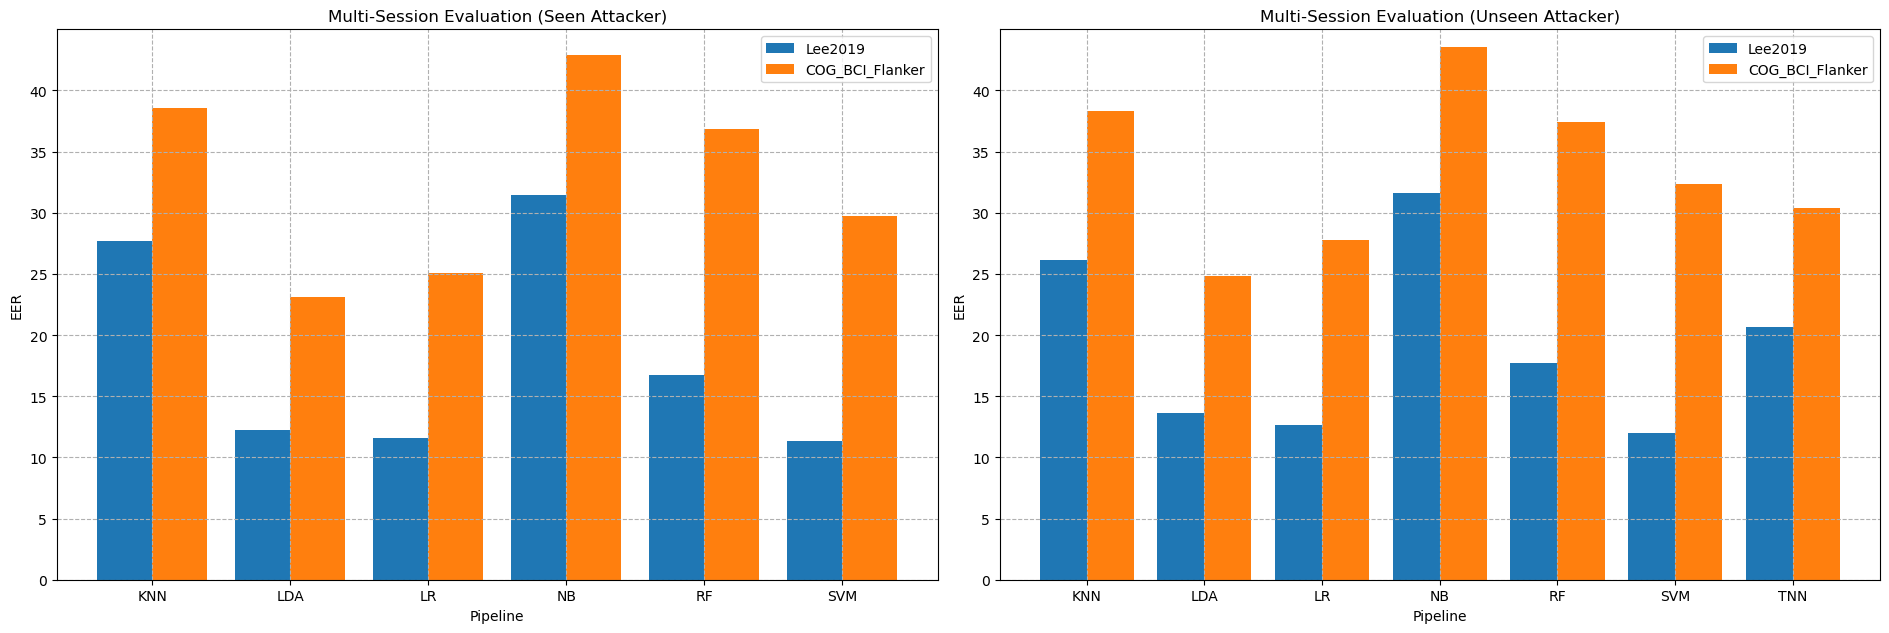

In [129]:
# Your DataFrames
df_close = table_df[table_df['eval Type']=='Close Set']
df_open = table_df[table_df['eval Type']=='Open Set']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 7))
# fig.suptitle('Single-Session Evaluation')

# Plotting for Close Set
axs[0].set_title('Multi-Session Evaluation (Seen Attacker)')
df_close['eer'] = df_close['eer'].astype(float)
pipelines_close = df_close['pipeline'].unique()
datasets_close = [ "Lee2019", "COG_BCI_Flanker"]
bar_width_close = 0.4
index_close = pd.Series(range(len(pipelines_close)))

for i, dataset in enumerate(datasets_close):
    dataset_df = df_close[df_close['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[0].bar(index_close + (bar_width_close * i), eer_values, bar_width_close, label=dataset)

axs[0].set_xlabel('Pipeline')
axs[0].set_ylabel('EER')
axs[0].set_xticks(index_close + bar_width_close * (len(datasets_close) - 1) / 2)
axs[0].set_xticklabels(pipelines_close)
axs[0].set_ylim(0, 45)
axs[0].set_yticks(range(0, 45, 5))
axs[0].grid(True, ls="--", lw=0.8)
axs[0].legend()

# Plotting for Open Set
axs[1].set_title('Multi-Session Evaluation (Unseen Attacker)')
df_open['eer'] = df_open['eer'].astype(float)
pipelines_open = df_open['pipeline'].unique()
datasets_open = [ "Lee2019", "COG_BCI_Flanker"]
bar_width_open = 0.4
index_open = pd.Series(range(len(pipelines_open)))

for i, dataset in enumerate(datasets_open):
    dataset_df = df_open[df_open['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[1].bar(index_open + (bar_width_open * i), eer_values, bar_width_open, label=dataset)

axs[1].set_xlabel('Pipeline')
axs[1].set_ylabel('EER')
axs[1].set_ylim(0, 45)
axs[1].set_yticks(range(0, 45, 5))
axs[1].set_xticks(index_open + bar_width_open * (len(datasets_open) - 1) / 2)
axs[1].set_xticklabels(pipelines_open)
axs[1].grid(True, ls="--", lw=0.8)
axs[1].legend()

# Setting y-axis limits for both subplots
max_eer = max(df_close['eer'].max(), df_open['eer'].max())
for ax in axs:
    ax.set_yticks(range(0, int(max_eer) + 1, 5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlapping titles
plt.savefig('Single_Session_Evaluation.pdf', bbox_inches="tight")
plt.show()
del fig, axs


<Figure size 1000x600 with 0 Axes>

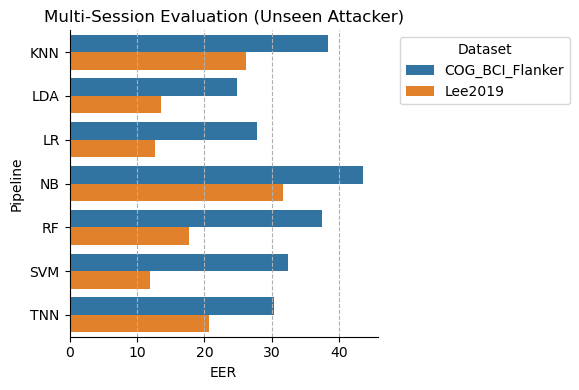

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
df_open = table_df[table_df['eval Type'] == 'Open Set']
df_open['eer'] = df_open['eer'].astype(float)

# Choose the desired datasets
datasets_open = ["Lee2019", "COG_BCI_Flanker"]

# Filter DataFrame for the selected datasets
df_open_selected = df_open[df_open['dataset'].isin(datasets_open)]

# Set up the seaborn catplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.catplot(x='eer', y='pipeline', hue='dataset', kind='bar', data=df_open_selected, height=4, aspect=1.5, legend_out=False)

# Set labels and title
plt.xlabel('EER')
plt.ylabel('Pipeline')
plt.title('Multi-Session Evaluation (Unseen Attacker)')

plt.grid(True, axis='x', linestyle='--', linewidth=0.8)
ax.ax.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the bbox_to_anchor as needed

plt.tight_layout()
plt.savefig('Unseen_Attacker_Evaluation.pdf', bbox_inches="tight")
plt.show()


<Figure size 1000x600 with 0 Axes>

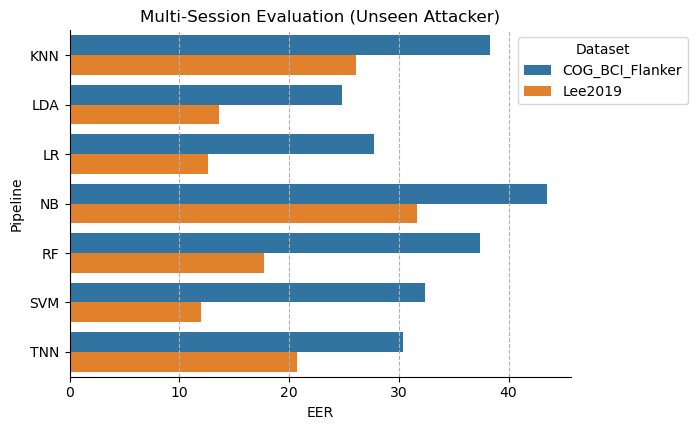

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
df_open = table_df[table_df['eval Type'] == 'Open Set']
df_open['eer'] = df_open['eer'].astype(float)

# Choose the desired datasets
datasets_open = ["COG_BCI_Flanker", "Lee2019"]

# Filter DataFrame for the selected datasets
df_open_selected = df_open[df_open['dataset'].isin(datasets_open)]

# Set up the seaborn catplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.catplot(x='eer', y='pipeline', hue='dataset', kind='bar', data=df_open_selected, height=4.4, aspect=1.58, legend_out=False)

# Set labels and title
plt.xlabel('EER')
plt.ylabel('Pipeline')
plt.title('Multi-Session Evaluation (Unseen Attacker)')

plt.grid(True, axis='x', linestyle='--', linewidth=0.8)
ax.ax.legend(title='Dataset', bbox_to_anchor=(0.88, 1), loc='upper left')  # Adjust the bbox_to_anchor as needed

plt.tight_layout()
plt.savefig('Unseen_Attacker_Evaluation.pdf', bbox_inches="tight")
plt.show()


<Figure size 1000x600 with 0 Axes>

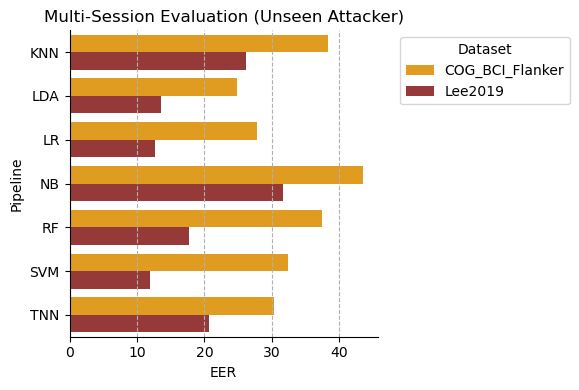

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
df_open = table_df[table_df['eval Type'] == 'Open Set']
df_open['eer'] = df_open['eer'].astype(float)

# Choose the desired datasets
datasets_open = ["Lee2019", "COG_BCI_Flanker"]

# Filter DataFrame for the selected datasets
df_open_selected = df_open[df_open['dataset'].isin(datasets_open)]

# Define a color palette for the datasets
palette = {'COG_BCI_Flanker': 'orange', 'Lee2019': 'brown'}

# Set up the seaborn catplot with the specified palette
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.catplot(x='eer', y='pipeline', hue='dataset', kind='bar', data=df_open_selected, height=4, aspect=1.5, palette=palette, legend_out=False)

# Set labels and title
plt.xlabel('EER')
plt.ylabel('Pipeline')
plt.title('Multi-Session Evaluation (Unseen Attacker)')

plt.grid(True, axis='x', linestyle='--', linewidth=0.8)
ax.ax.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the bbox_to_anchor as needed

plt.tight_layout()
plt.savefig('Unseen_Attacker_Evaluation.pdf', bbox_inches="tight")
plt.show()


In [133]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<Figure size 1000x600 with 0 Axes>

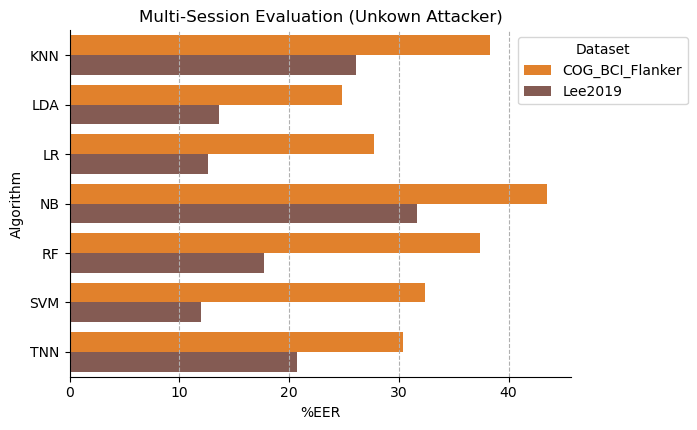

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
df_open = table_df[table_df['eval Type'] == 'Open Set']
df_open['eer'] = df_open['eer'].astype(float)

# Choose the desired datasets
datasets_open = ["COG_BCI_Flanker", "Lee2019"]

# Filter DataFrame for the selected datasets
df_open_selected = df_open[df_open['dataset'].isin(datasets_open)]

# Create a custom color palette
custom_palette = {"Lee2019": sns.color_palette()[5], "COG_BCI_Flanker": sns.color_palette()[1]}

# Set up the seaborn catplot with the custom palette
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.catplot(x='eer', y='pipeline', hue='dataset', kind='bar', data=df_open_selected, height=4.4, aspect=1.58, legend_out=False, palette=custom_palette)

# Set labels and title
plt.xlabel('%EER')
plt.ylabel('Algorithm')
plt.title('Multi-Session Evaluation (Unkown Attacker)')

plt.grid(True, axis='x', linestyle='--', linewidth=0.8)
ax.ax.legend(title='Dataset', bbox_to_anchor=(0.88, 1), loc='upper left')  # Adjust the bbox_to_anchor as needed

plt.tight_layout()
plt.savefig('Multi_Session_Unseen_Attacker_Evaluation.pdf', bbox_inches="tight")
plt.show()


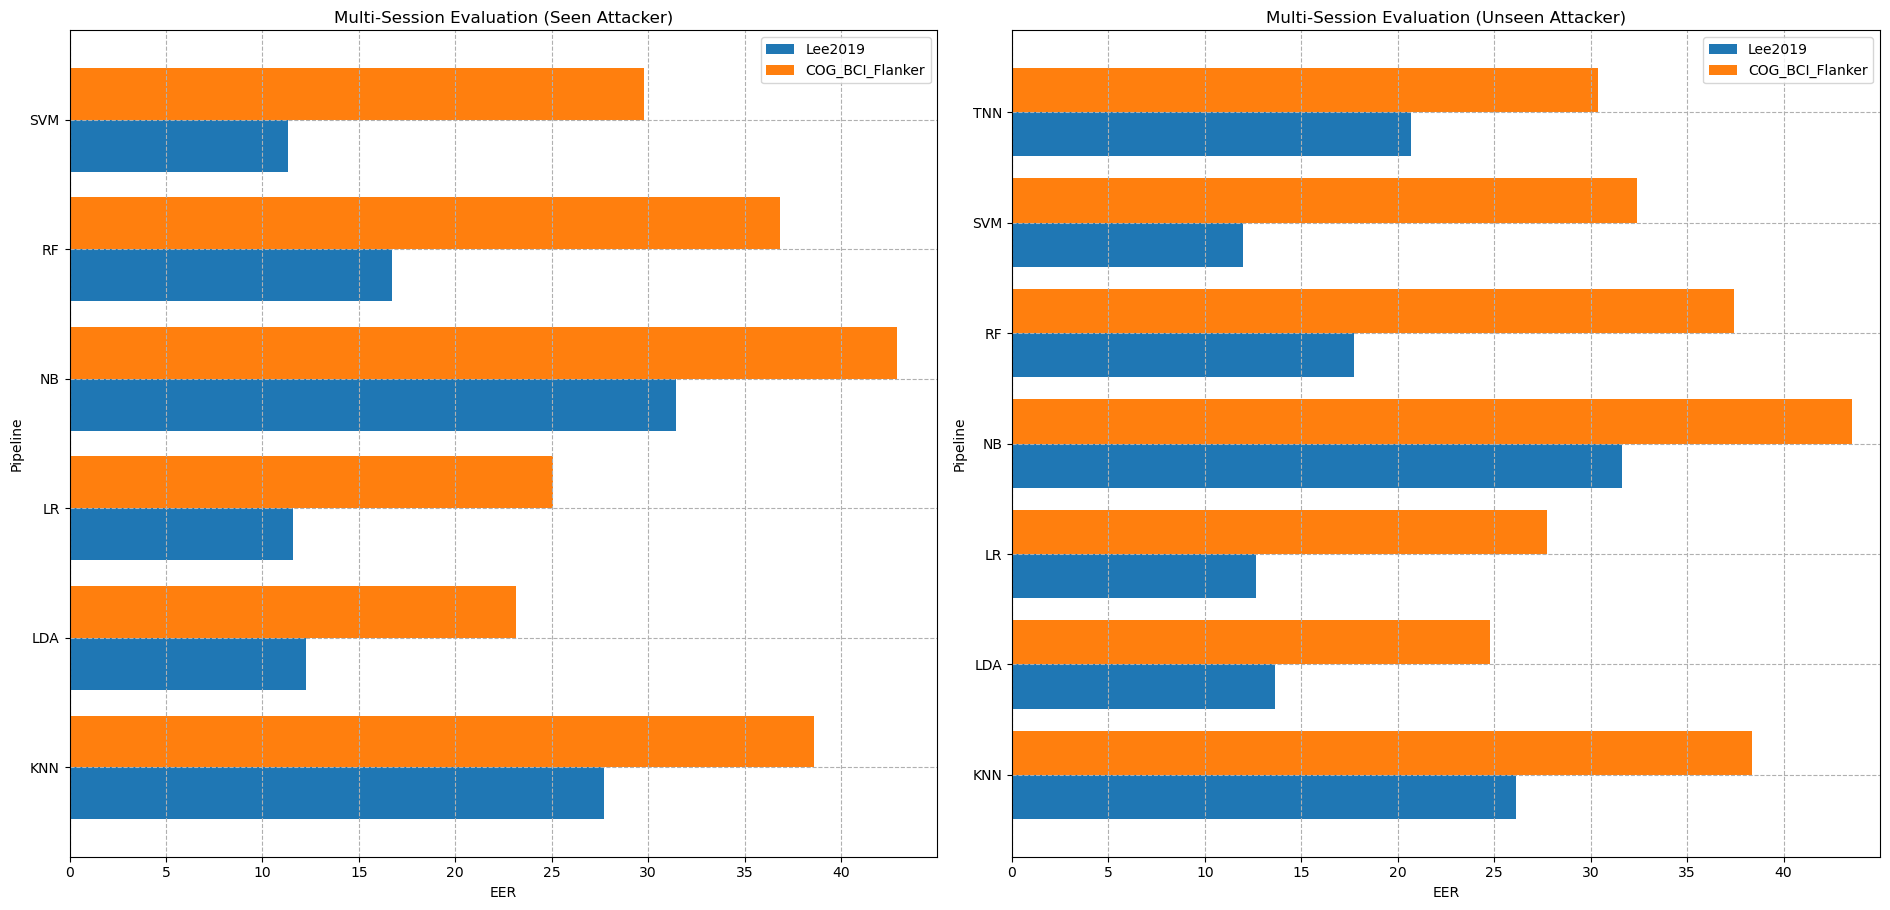

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrames
df_close = table_df[table_df['eval Type']=='Close Set']
df_open = table_df[table_df['eval Type']=='Open Set']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 10))
# fig.suptitle('Single-Session Evaluation')

# Plotting for Close Set
axs[0].set_title('Multi-Session Evaluation (Seen Attacker)')
df_close['eer'] = df_close['eer'].astype(float)
pipelines_close = df_close['pipeline'].unique()
datasets_close = [ "Lee2019", "COG_BCI_Flanker"]
bar_width_close = 0.4
index_close = pd.Series(range(len(pipelines_close)))

for i, dataset in enumerate(datasets_close):
    dataset_df = df_close[df_close['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[0].barh(index_close + (bar_width_close * i), eer_values, bar_width_close, label=dataset)

axs[0].set_xlabel('EER')
axs[0].set_ylabel('Pipeline')
axs[0].set_yticks(index_close + bar_width_close * (len(datasets_close) - 1) / 2)
axs[0].set_yticklabels(pipelines_close)
axs[0].set_xlim(0, 45)
axs[0].set_xticks(range(0, 45, 5))
axs[0].grid(True, ls="--", lw=0.8)
axs[0].legend()

# Plotting for Open Set
axs[1].set_title('Multi-Session Evaluation (Unseen Attacker)')
df_open['eer'] = df_open['eer'].astype(float)
pipelines_open = df_open['pipeline'].unique()
datasets_open = [ "Lee2019", "COG_BCI_Flanker"]
bar_width_open = 0.4
index_open = pd.Series(range(len(pipelines_open)))

for i, dataset in enumerate(datasets_open):
    dataset_df = df_open[df_open['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[1].barh(index_open + (bar_width_open * i), eer_values, bar_width_open, label=dataset)

axs[1].set_xlabel('EER')
axs[1].set_ylabel('Pipeline')
axs[1].set_xlim(0, 45)
axs[1].set_xticks(range(0, 45, 5))
axs[1].set_yticks(index_open + bar_width_open * (len(datasets_open) - 1) / 2)
axs[1].set_yticklabels(pipelines_open)
axs[1].grid(True, ls="--", lw=0.8)
axs[1].legend()

# Setting x-axis limits for both subplots
max_eer = max(df_close['eer'].max(), df_open['eer'].max())
for ax in axs:
    ax.set_xticks(range(0, int(max_eer) + 1, 5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlapping titles
plt.savefig('Single_Session_Evaluation_Horizontal.pdf', bbox_inches="tight")
plt.show()


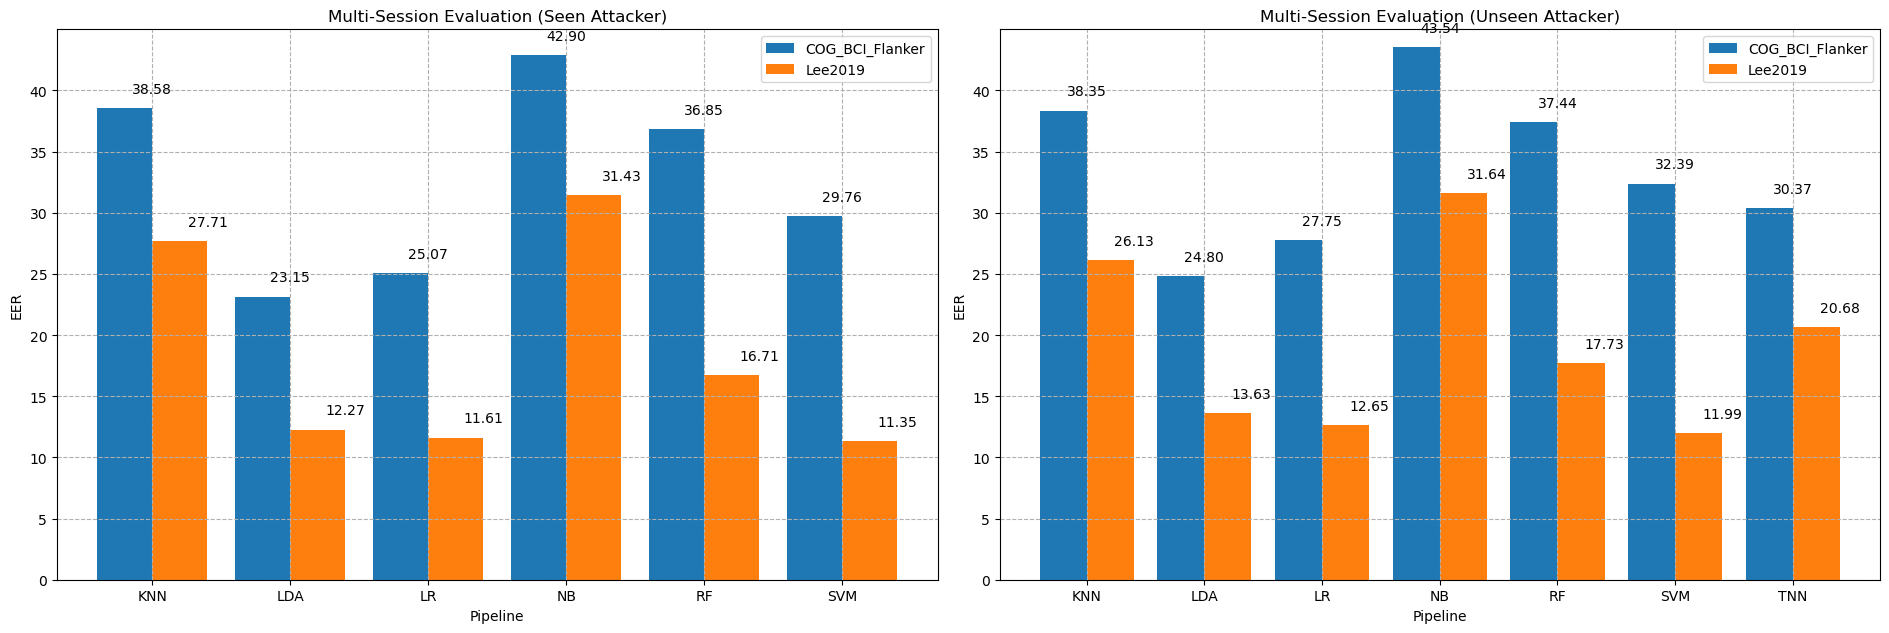

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrames
df_close = table_df[table_df['eval Type']=='Close Set']
df_open = table_df[table_df['eval Type']=='Open Set']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 7))
# fig.suptitle('Single-Session Evaluation')

# Plotting for Close Set
axs[0].set_title('Multi-Session Evaluation (Seen Attacker)')
df_close['eer'] = df_close['eer'].astype(float)
pipelines_close = df_close['pipeline'].unique()
datasets_close = ["COG_BCI_Flanker", "Lee2019"]
bar_width_close = 0.4
index_close = pd.Series(range(len(pipelines_close)))

for i, dataset in enumerate(datasets_close):
    dataset_df = df_close[df_close['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[0].bar(index_close + (bar_width_close * i), eer_values, bar_width_close, label=dataset)

    # Add text labels on top of each bar
    for x, y in zip(index_close + bar_width_close * i, eer_values):
        axs[0].text(x + bar_width_close / 2, y + 1, f'{y:.2f}', ha='center', va='bottom', color='black')

axs[0].set_xlabel('Pipeline')
axs[0].set_ylabel('EER')
axs[0].set_xticks(index_close + bar_width_close * (len(datasets_close) - 1) / 2)
axs[0].set_xticklabels(pipelines_close)
axs[0].set_ylim(0, 45)
axs[0].set_yticks(range(0, 45, 5))
axs[0].grid(True, ls="--", lw=0.8)
axs[0].legend()

# Plotting for Open Set
axs[1].set_title('Multi-Session Evaluation (Unseen Attacker)')
df_open['eer'] = df_open['eer'].astype(float)
pipelines_open = df_open['pipeline'].unique()
datasets_open = ["COG_BCI_Flanker", "Lee2019"]
bar_width_open = 0.4
index_open = pd.Series(range(len(pipelines_open)))

for i, dataset in enumerate(datasets_open):
    dataset_df = df_open[df_open['dataset'] == dataset]
    eer_values = dataset_df['eer'].tolist()
    axs[1].bar(index_open + (bar_width_open * i), eer_values, bar_width_open, label=dataset)

    # Add text labels on top of each bar
    for x, y in zip(index_open + bar_width_open * i, eer_values):
        axs[1].text(x + bar_width_open / 2, y + 1, f'{y:.2f}', ha='center', va='bottom', color='black')

axs[1].set_xlabel('Pipeline')
axs[1].set_ylabel('EER')
axs[1].set_ylim(0, 45)
axs[1].set_yticks(range(0, 45, 5))
axs[1].set_xticks(index_open + bar_width_open * (len(datasets_open) - 1) / 2)
axs[1].set_xticklabels(pipelines_open)
axs[1].grid(True, ls="--", lw=0.8)
axs[1].legend()

# Setting y-axis limits for both subplots
max_eer = max(df_close['eer'].max(), df_open['eer'].max())
for ax in axs:
    ax.set_yticks(range(0, int(max_eer) + 1, 5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlapping titles
plt.savefig('Single_Session_Evaluation.pdf', bbox_inches="tight")
plt.show()
